# **Data Preparation**

In [39]:
# Here, I am importing the pandas library and loading the CSV file into a DataFrame
import pandas as pd

Netflix_shows_movies = pd.read_csv("netflix_data.csv")

# **Data Cleaning**

In [40]:
# Here, I am checking for missing values
print(Netflix_shows_movies.isnull().sum())

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [41]:
# Here, I am addressing missing Values by droping them.
Netflix_shows_movies_clean = Netflix_shows_movies.dropna()  # or use fillna() for specific columns

# **Data Exploration**

In [42]:
# Here, I am describing the data to get basic statistical details and displaying the structure of the dataset
print(Netflix_shows_movies_clean.describe())

print(Netflix_shows_movies_clean.info())

            show_id  release_year
count  3.774000e+03   3774.000000
mean   7.510908e+07   2012.087440
std    1.341114e+07      9.566944
min    2.477470e+05   1942.000000
25%    7.027581e+07   2011.000000
50%    8.014732e+07   2016.000000
75%    8.024067e+07   2017.000000
max    8.123573e+07   2020.000000
<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 6213
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtyp

In [43]:
# Here, I am geting a count of each unique genre and rating
genre_counts = Netflix_shows_movies_clean['listed_in'].value_counts()
print(genre_counts)

rating_counts = Netflix_shows_movies_clean['rating'].value_counts()
print(rating_counts)

listed_in
Dramas, International Movies                                237
Stand-Up Comedy                                             234
Dramas, Independent Movies, International Movies            184
Comedies, Dramas, International Movies                      168
Documentaries                                               136
                                                           ... 
Dramas, Faith & Spirituality, Romantic Movies                 1
Stand-Up Comedy & Talk Shows                                  1
Action & Adventure, Children & Family Movies                  1
Action & Adventure, Classic Movies, International Movies      1
International TV Shows, Romantic TV Shows, TV Comedies        1
Name: count, Length: 296, dtype: int64
rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Na

In [44]:
# Here, I am getting the number of shows by release year
shows_by_release_year = Netflix_shows_movies_clean.groupby('release_year')['show_id'].count()
print(shows_by_release_year)

# Here, I am counting shows/movies per genre
count_by_genre = Netflix_shows_movies_clean.groupby('listed_in').size()
print(count_by_genre)

release_year
1942      1
1944      1
1945      1
1946      2
1947      1
       ... 
2016    514
2017    585
2018    537
2019    326
2020      6
Name: show_id, Length: 69, dtype: int64
listed_in
Action & Adventure                                              68
Action & Adventure, Anime Features, Children & Family Movies     1
Action & Adventure, Anime Features, Classic Movies               1
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        25
                                                                ..
TV Comedies, TV Dramas                                           1
TV Dramas, TV Sci-Fi & Fantasy                                   1
TV Horror, TV Mysteries, TV Thrillers                            1
TV Shows                                                         4
Thrillers                                                       40
Length: 296, dtype: int64


# **Data Visualization**

listed_in
Dramas, International Movies                        237
Stand-Up Comedy                                     234
Dramas, Independent Movies, International Movies    184
Comedies, Dramas, International Movies              168
Documentaries                                       136
Name: count, dtype: int64


<ipython-input-45-d10f825864f7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


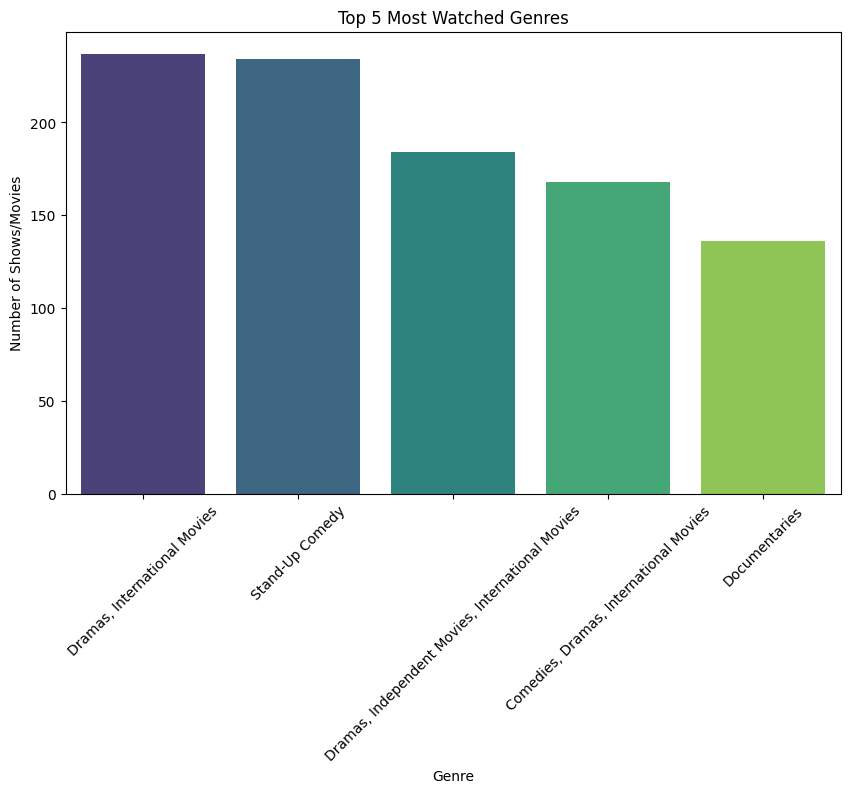

In [45]:
# Here, I am importing my data visulization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Here, I am calculating the Top 5 Most Watched Genres
top_genres = Netflix_shows_movies_clean['listed_in'].value_counts().nlargest(5)
print(top_genres)

# Here, I am plotting the Top 5 Most Watched Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 5 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Shows/Movies')
plt.xticks(rotation=45)
plt.show()


rating
TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: count, dtype: int64


<ipython-input-46-ff5961e95e9a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')


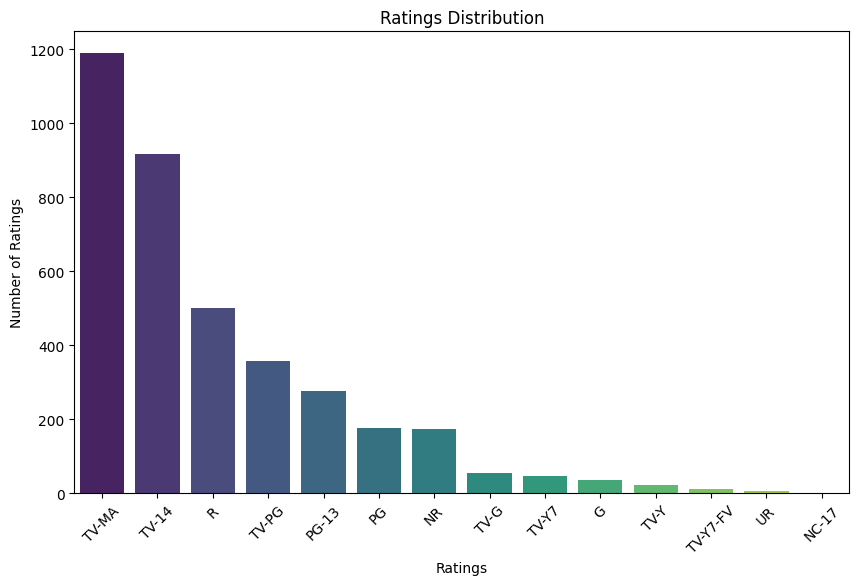

In [46]:
# Here, I am getting the distribution of the ratings
rating_distribution = Netflix_shows_movies_clean['rating'].value_counts()
print(rating_distribution)

# Here, I am plotting the distribution of the ratings
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_distribution.index, y=rating_distribution.values, palette='viridis')
plt.title('Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()
